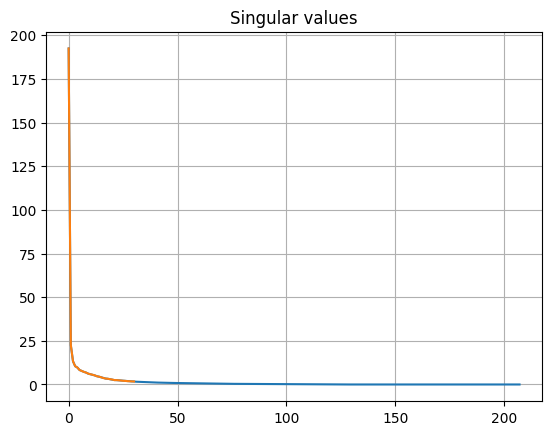

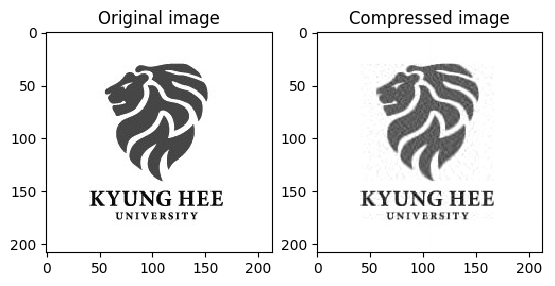

44304 real numbers in the original image
13082 real numbers in the original image
Compression ratio: 0.295278078728783


/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [1]:
# simple image compression by svd 

using Images, FileIO, PyPlot

# read khulogo.jpg anto an array
img = Float64.(load("khulogo.jpg"));

# img: mxn image
m = size(img,1);
n = size(img,2);

# singular value decomposition
U, S, V = svd(img);

# take 15% of the most significant singular values
cutRatio = 0.15;  
N = round(Int, cutRatio*length(S) );     

# compression by taking N largest singular values
U_compressed = U[:,1:N];               
S_compressed = S[1:N];
V_compressed = V[:,1:N];

# plot singular values
figure(1);
grid("True");
plot(S);
plot(S_compressed);
title("Singular values");

# image reconstruction
img_compressed = U_compressed*diagm(S_compressed)*V_compressed';
img_compressed = max(min(img_compressed,1.0),0);
save("khulogo_compressed.jpg",img_compressed);

# compare the image quality
figure(2);
subplot(1,2,1);
imshow(img, cmap="gray");
title("Original image");
subplot(1,2,2);
imshow(img_compressed, cmap="gray");
title("Compressed image");

# compute the compression ratio and print out the results
Nreal = m*n;
Nreal_compressed = N*(m+n+1);
println("$(Nreal) real numbers in the original image")
println("$(Nreal_compressed) real numbers in the original image")
println("Compression ratio: $(Nreal_compressed/Nreal)")


In [2]:
using Metalhead

# load the vgg-19 deep neural networks
vgg = VGG19();

# classify the images
class_original = classify(vgg, Gray.(Float32.(img)));
class_compressed = classify(vgg, Gray.(Float32.(img_compressed)));

println("Original logo: ",class_original);
println("Compressed logo: ",class_compressed);


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   601    0   601    0     0   2435      0 --:--:-- --:--:-- --:--:--  2443
100  548M  100  548M    0     0  57.6M      0  0:00:09  0:00:09 --:--:-- 75.4M


Original logo: hair slide
Compressed logo: pick, plectrum, plectron
